# Dataset Description
See, fork, and run a random forest benchmark model through Kaggle Scripts

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

**Data Fields**

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Data Preparing

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['quarter'] = df['datetime'].dt.quarter
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['holiday'] = df['holiday'].map({0:'Not holiday',1:'holiday'})
df['workingday'] = df['workingday'].map({0:'Not workingday',1:'workingday'})
df['weather'] = df['weather'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                   2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                   3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                   4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

# Bike Shaing count by Year

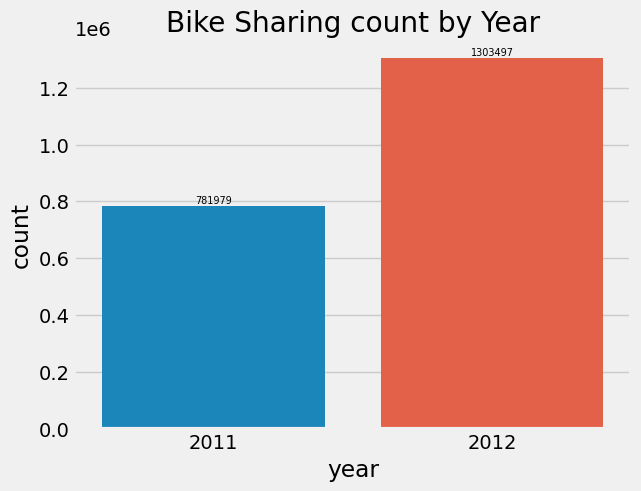

In [6]:
year_count = df.groupby('year')['count'].sum().reset_index()
g = sns.barplot(data=year_count,x='year',y='count')
for v in year_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1e4,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Year')
plt.show()

# Bike Shaing count by Quarter and Year

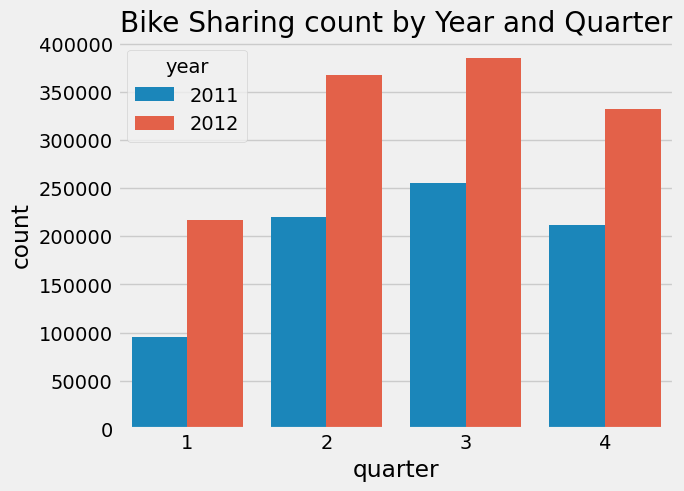

In [7]:
year_quarter_count = df.groupby(['year','quarter'])['count'].sum().reset_index()
sns.barplot(data=year_quarter_count,x='quarter',y='count',hue='year')
plt.title('Bike Sharing count by Year and Quarter')
plt.show()

# Bike Shaing count by Month and Year

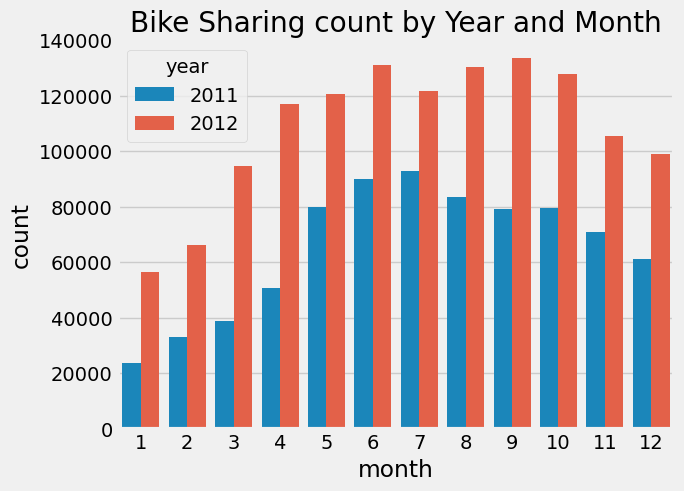

In [8]:
year_month_count = df.groupby(['year','month'])['count'].sum().reset_index()
sns.barplot(data=year_month_count,x='month',y='count',hue='year')
plt.title('Bike Sharing count by Year and Month')
plt.show()

# Bike Shaing count by Day and Year

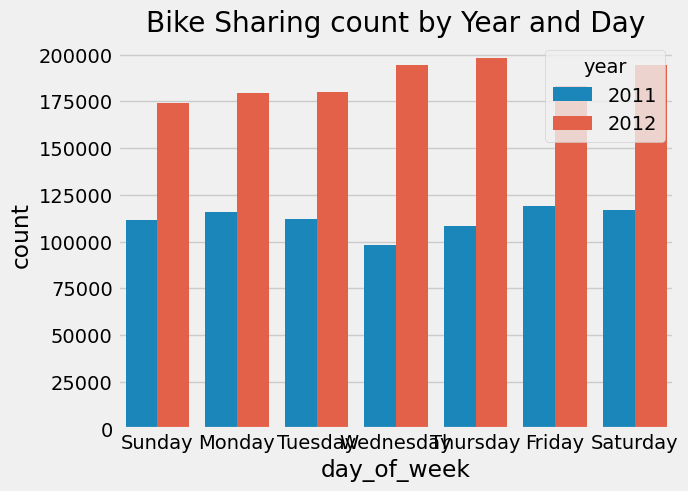

In [9]:
year_day_count = df.groupby(['year','day_of_week'])['count'].sum().reset_index()
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.barplot(data=year_day_count,x='day_of_week',y='count',hue='year',order=order)
plt.title('Bike Sharing count by Year and Day')
plt.show()

# Bike Shaing count by Hour and Year

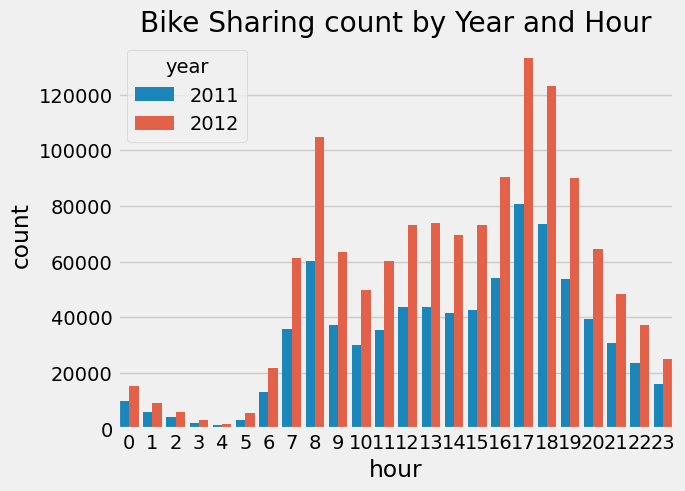

In [10]:
year_hour_count = df.groupby(['year','hour'])['count'].sum().reset_index()
sns.barplot(data=year_hour_count,x='hour',y='count',hue='year')
plt.title('Bike Sharing count by Year and Hour')
plt.show()

# Bike Shaing count by Season and Year

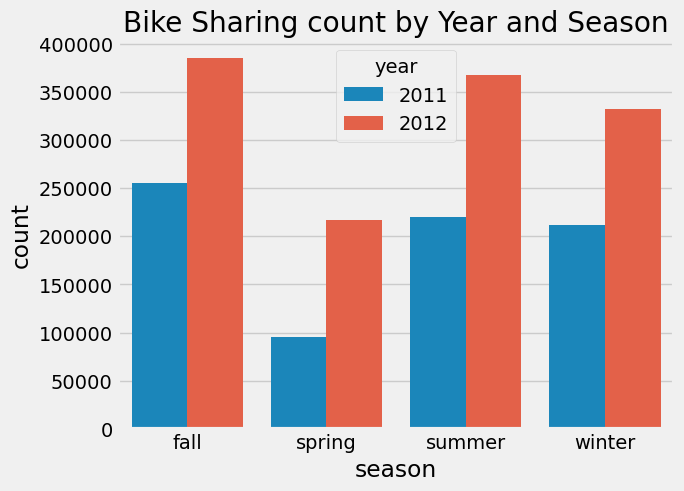

In [11]:
year_season_count = df.groupby(['year','season'])['count'].sum().reset_index()
sns.barplot(data=year_season_count,x='season',y='count',hue='year')
plt.title('Bike Sharing count by Year and Season')
plt.show()

# Bike Shaing count by Holiday or Not

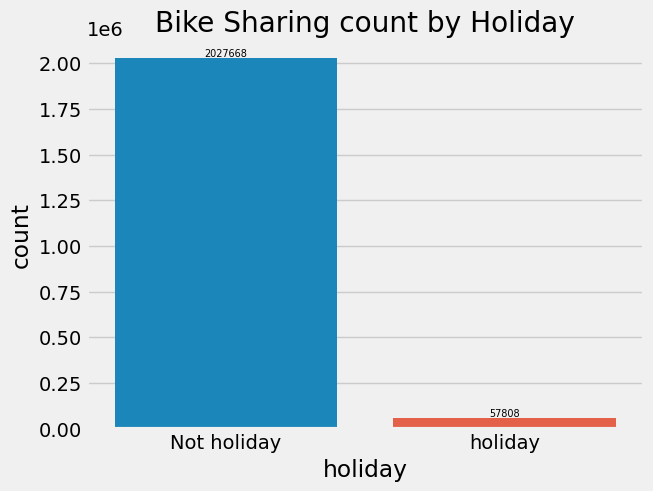

In [12]:
holiday_count = df.groupby('holiday')['count'].sum().reset_index()
g = sns.barplot(data=holiday_count,x='holiday',y='count')
for v in holiday_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1e4,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Holiday')
plt.show()

# Bike Shaing count by Workingday or Not

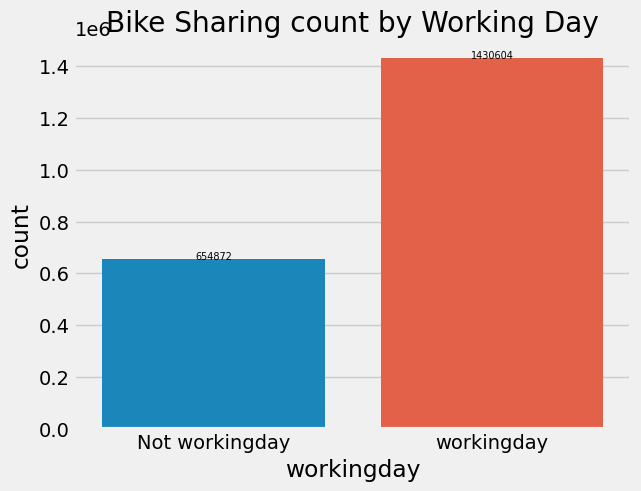

In [13]:
work_count = df.groupby('workingday')['count'].sum().reset_index()
g = sns.barplot(data=work_count,x='workingday',y='count')
for v in work_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Working Day')
plt.show()

# Bike Shaing count by Weather

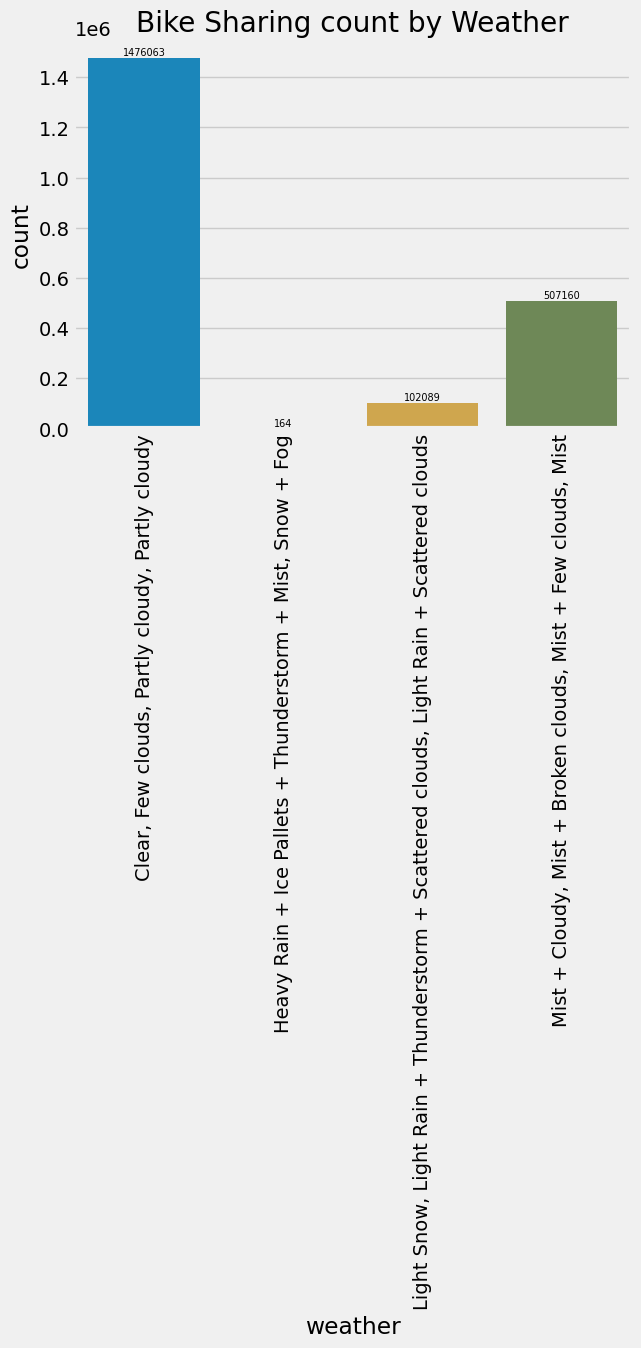

In [14]:
weather_count = df.groupby('weather')['count'].sum().reset_index()
g = sns.barplot(data=weather_count,x='weather',y='count')
for v in weather_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1e4,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Weather')
plt.xticks(rotation=90)
plt.show()

# Distribution of count
As graph show below at left, we see that the distribution of count variable skewed towards right. It is desirable to have Normal Distribution as most of Machine Learning techniques require dependent variable to be normal. One possible solution is to take log transformation on 'count' variable. After transfome the data the figure looks better but still not ideally following normal distribution.

<AxesSubplot:xlabel='count', ylabel='Density'>

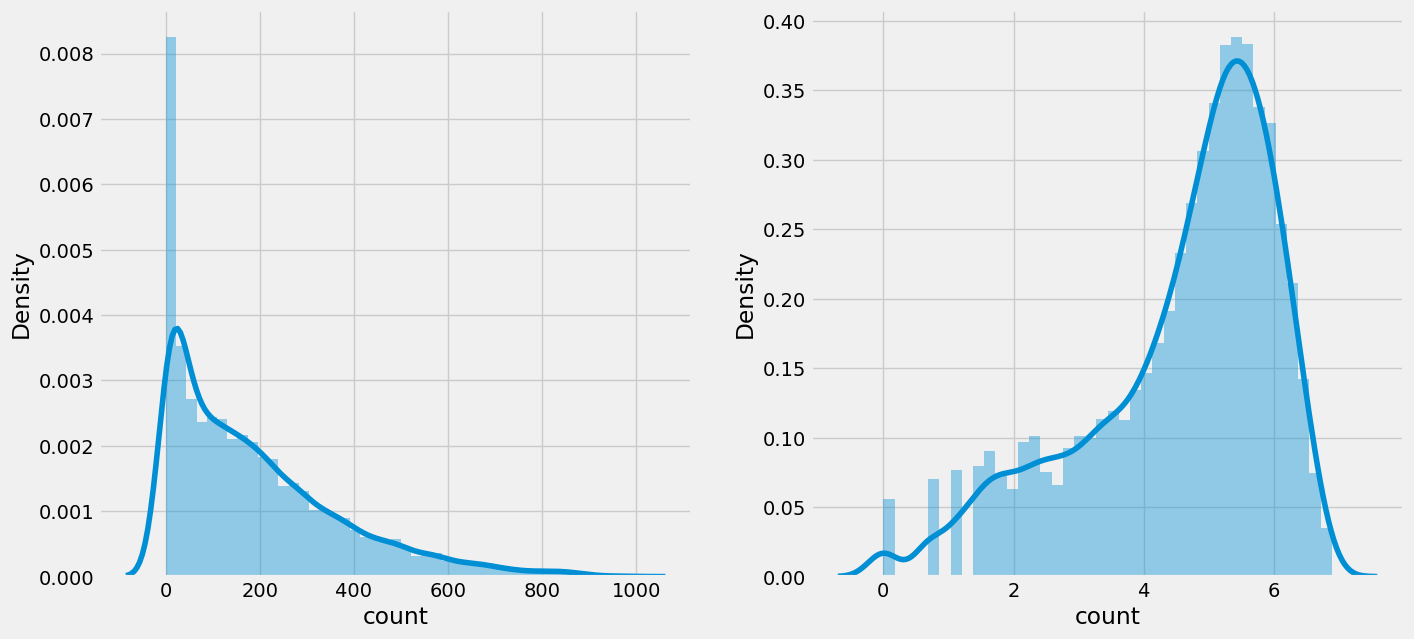

In [15]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(df['count'])
plt.subplot(1,2,2)
sns.distplot(np.log(df['count']))

# Visualization of temp,humidity and windspeed

<AxesSubplot:xlabel='windspeed', ylabel='count'>

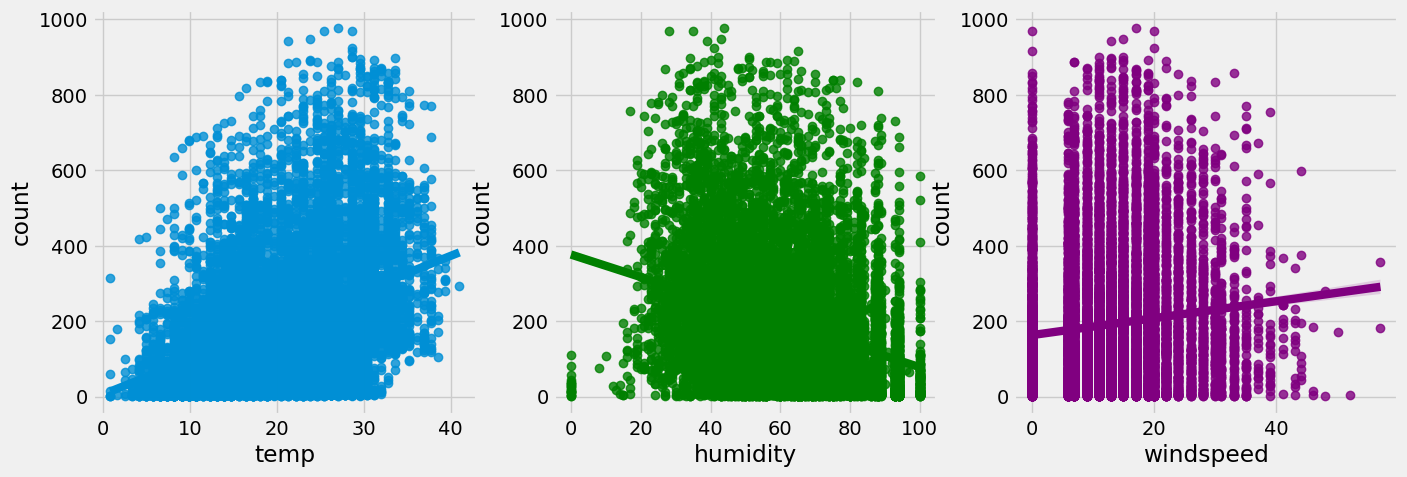

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.regplot(data=df,x='temp',y='count')
plt.subplot(1,3,2)
sns.regplot(data=df,x='humidity',y='count',color='green')
plt.subplot(1,3,3)
sns.regplot(data=df,x='windspeed',y='count',color='purple')

# Visualization of Hour & Count Vs (season,day, registered)

<AxesSubplot:xlabel='hour', ylabel='count'>

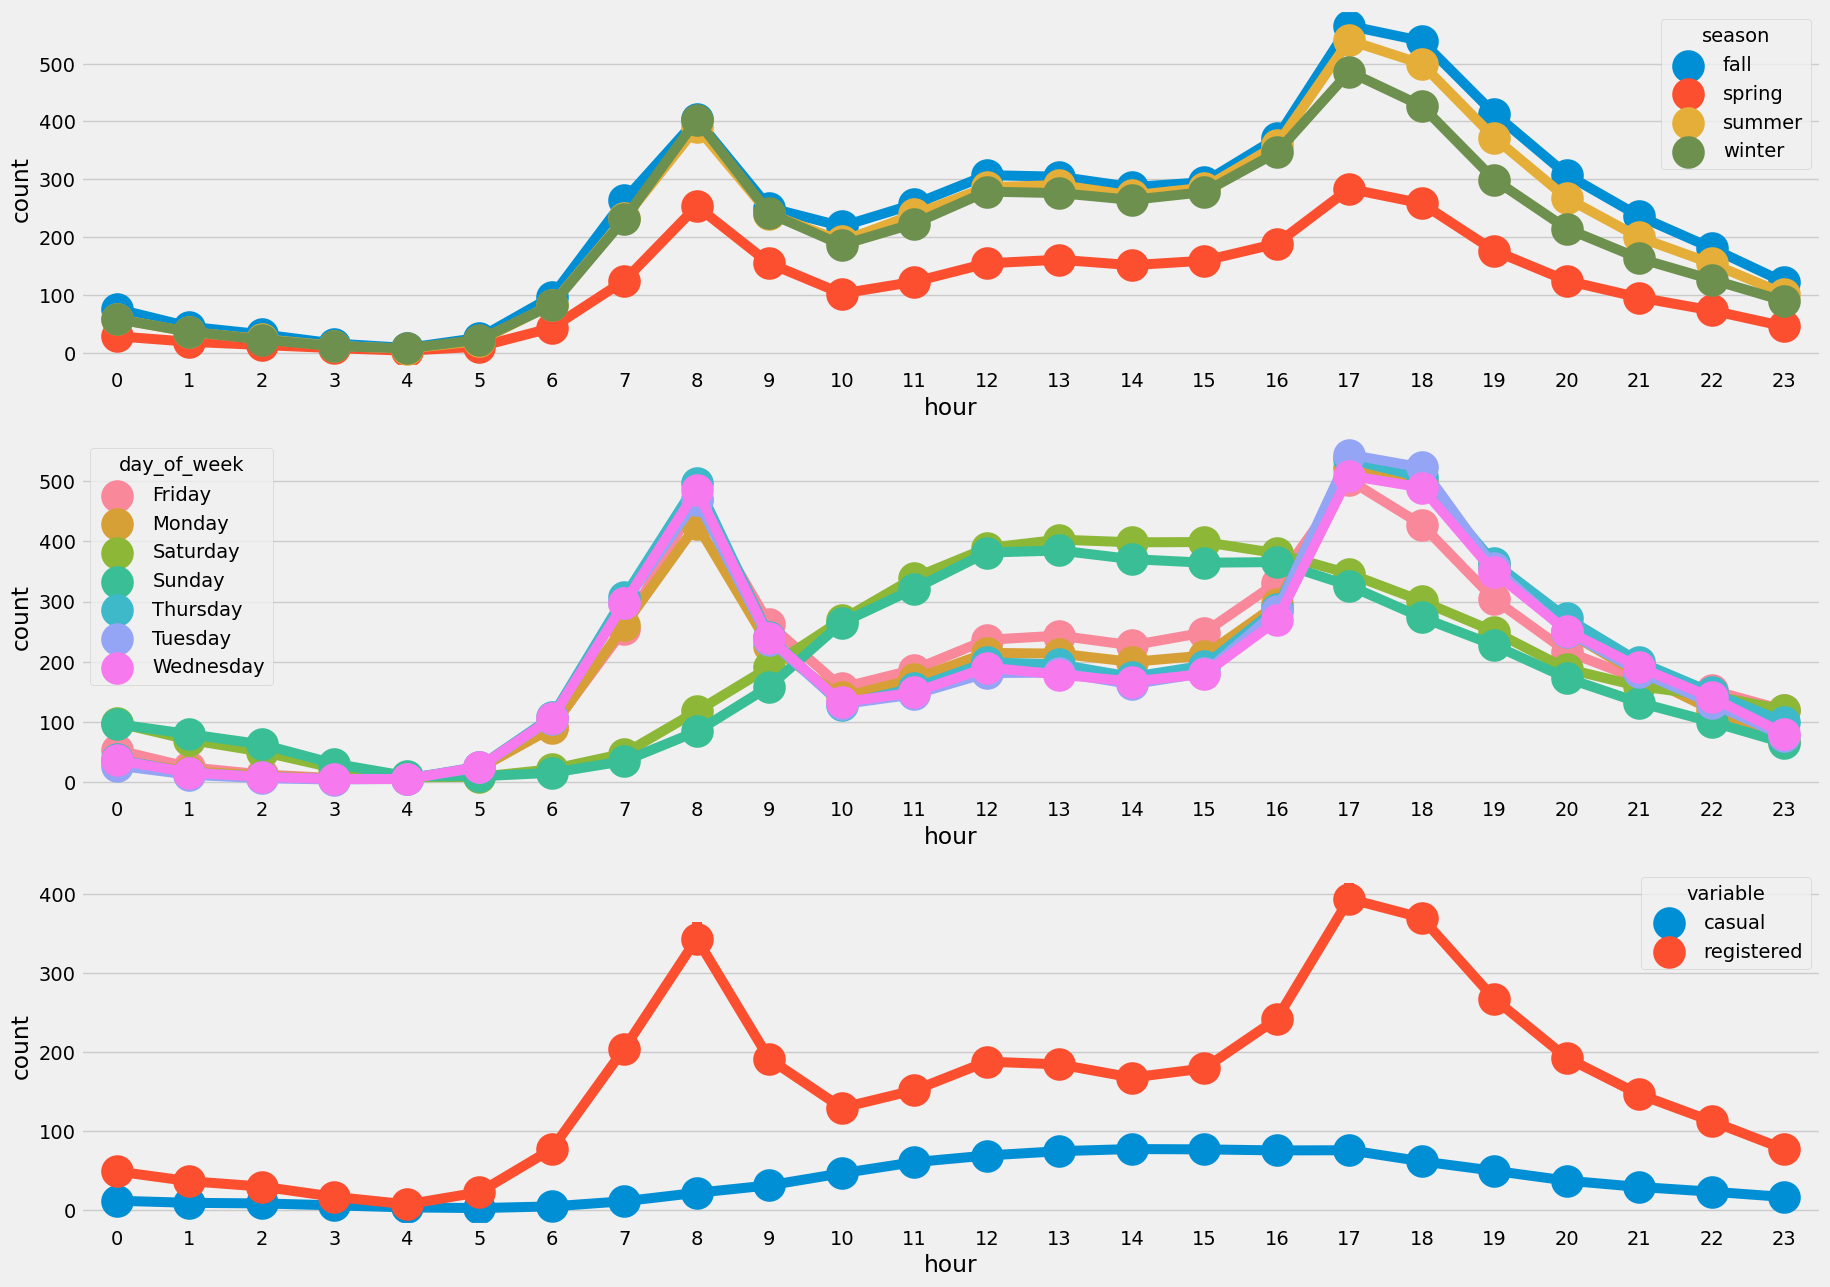

In [17]:
hour_season_count = df.groupby(['hour','season'])['count'].mean().reset_index()
hour_day_count = df.groupby(['hour','day_of_week'])['count'].mean().reset_index()
hour_reg_count = df.groupby(['hour','casual','registered'])['count'].mean().reset_index()
hour_reg_count = pd.melt(hour_reg_count,id_vars=['hour'],value_vars=['casual','registered'],value_name='count')

plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.pointplot(data=hour_season_count,x='hour',y='count',hue='season')
plt.subplot(3,1,2)
sns.pointplot(data=hour_day_count,x='hour',y='count',hue='day_of_week')
plt.subplot(3,1,3)
sns.pointplot(data=hour_reg_count,x='hour',y='count',hue='variable')

# Data Preprocessing

In [18]:
df.drop(['datetime','casual','registered','year'],axis=1,inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = le.fit_transform(df[c])

In [20]:
X = df.drop('count',axis=1)
y = df['count']

In [21]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8708, 12), (8708,), (2178, 12), (2178,))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test) 
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.0,1.0,0.0,0.673469,0.694932,0.83,0.105325,0.666667,0.545455,1.000000,0.217391
1,0.000000,0.0,0.0,0.0,0.897959,0.898311,0.39,0.350888,0.666667,0.636364,0.333333,0.695652
2,0.000000,0.0,1.0,0.0,0.795918,0.779617,0.41,0.298225,0.666667,0.545455,1.000000,0.652174
3,0.666667,0.0,0.0,1.0,0.346939,0.389753,0.93,0.122840,0.333333,0.272727,0.500000,0.173913
4,1.000000,0.0,0.0,0.0,0.306122,0.321960,0.45,0.298225,1.000000,0.909091,0.333333,0.434783


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [24]:
# Creating an XGBRegression object with default paramters
xgb_reg = XGBRegressor(n_jobs = -1) # default paramters
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [25]:
# Fitting the XGBRegression model on the train dataset
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [26]:
# Predicting on the test dataset
y_pred_test = xgb_reg.predict(X_test)
r2score = round(r2_score(y_pred_test,y_test),2)*100
# Calculating the R2 score on the test dataset
print("R2 Score on Test Data is : ",r2score)

R2 Score on Test Data is :  86.0


In [27]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
rmse = round(math.sqrt(mse),2)
print(rmse)

62.92


# Random Search for Xgboost Regression

In [28]:
# Performing RandomizedSearchCV for hyperparameter tuning
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=folds, verbose=3, random_state=42)

# Fitting on the train set
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.795 total time=   8.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.878 total time=   4.6s
[CV 1/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.803 total time=   1.0s
[CV 2/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.824 total time=   1.0s
[CV 3/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.810 total time=   1.0s
[CV 4/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsamp

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha

In [29]:
# Printing the best score that we can get using the parameters
print('We can get score of :',random_search.best_score_,' using',random_search.best_params_)

We can get score of : 0.8840170937484298  using {'subsample': 0.6, 'n_estimators': 750, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.02, 'gamma': 0.5, 'colsample_bytree': 0.8}


In [30]:
# Creating XGBRegression model with the select hyperparameters
xgb_reg_hpt = XGBRegressor(subsample=0.6, n_estimators=750, min_child_weight=10,max_depth=10,
                               learning_rate=0.02, gamma=0.5, colsample_bytree=0.8, n_jobs = -1)
xgb_reg_hpt.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.5,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.02,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 10,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 750,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.6,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [31]:
# Fitting the model on the train set
xgb_reg_hpt.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=10,
             missing=nan, monotone_constraints='()', n_estimators=750,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [32]:
# Predicting on the test set
y_pred_test_hpt = xgb_reg_hpt.predict(X_test)

# Calculating R2 score on test set
r2score = round(r2_score(y_pred_test_hpt,y_test),2)*100

# Printing the R2 score on test dataset
print("R2 score on Test Data is : ",r2score)

R2 score on Test Data is :  87.0


In [33]:
# Calculating Mean Sqaured Error & Root Mean Squared Error of the test set
mse = mean_squared_error(y_test, y_pred_test_hpt)
rmse = round(math.sqrt(mse),2)
print(rmse)

60.56


# Prediction and Model evaluation

In [34]:
# Calculating R2 score
y_train_pred = xgb_reg_hpt.predict(X_train)
y_test_pred = xgb_reg_hpt.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 score on Training data : ",round(r2_train_lr,2)*100)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 score on Test data : ",round(r2_test_lr,2)*100)

R2 score on Training data :  97.0
R2 score on Test data :  89.0


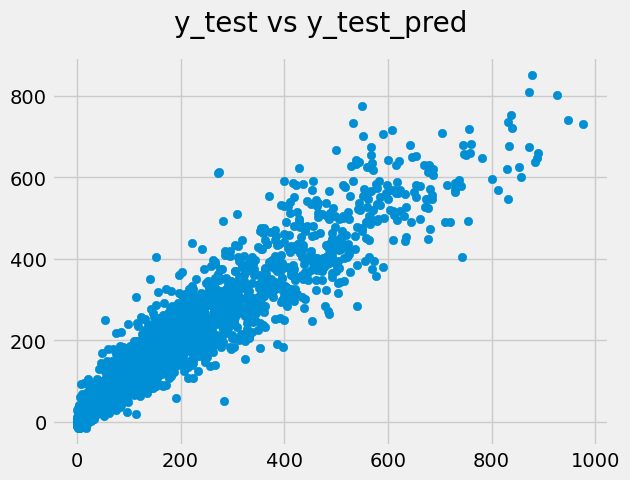

In [35]:
# Plotting a scatter plot of the actual and predicted values of the test set
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.scatter(y_test,y_test_pred)